## Customer Churn Analysis

### Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from pylab import rcParams
import matplotlib.ticker as mtick

In [2]:
file = pd.read_csv("C:\\Users\\HP\\Model.csv")
file.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
165,6345-FZOQH,Male,0,Yes,No,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1363.45,No
3252,1536-YHDOE,Male,0,Yes,Yes,17,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,62.10,1096.65,No
6961,8155-IBNHG,Female,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.40,1747.85,Yes
4744,6139-ZZRBQ,Male,1,No,No,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.05,1198.05,No
3589,8734-FNWVH,Male,0,Yes,Yes,31,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),59.70,1825.5,No


### Digging about the data!!

Each row gives information about the customer, there are total of 7043 entries with 20 variables to work with!
The Target for prediction is the'Churn' column, indicating whether or not the customer cancelled their service.

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Data Cleaning

If you see clearly in above information about each variables/columns type, you will realize that 'TotalCharges' is of type 'object' instead it should be 'float64'.

Presence of type 'object' means that there are clearly some non-numeric values in variable 'TotalCharges'

So, initially we would like to convert 'TotalCharges' type to float because it has some values which are blank or whitespaced.<br><br>
So there are two ways to achieve this:<br>
**1. astype(float) method**<br>
This method can be used when you know that there are all string values and no values are missing or blank<br>
Example: df['Col_name'] = **df['Col_name'].astype(float)**<br><br>
**2. to_numeric() method**<br>
This method can be used to convert all the strings or object type values to float and in fact it takes care of missing or blank values.<br>
Example: df['Col_name'] = **pd.to_numeric( df['Col_name'], errors = 'coerce' )** <br><br>
**Fact:** By setting errors= ’coerce’, you’ll transform the non-numeric values into **NaN**.


In [4]:
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'], errors = 'coerce')

In [5]:
file[file['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Now, 11 entries out of 7043 entries are having TotalCharges as Null values. May be it does make sense may be it does not to replace those with mean of the values. It doesn't make sense if we fill values as 0.<br><br>
But in this case as 11 out of 7043 just makes **0.15% of total data**. Eliminating 11 records and using rest of the data for prediction does also makes sense.<br><br>
**Let us just delete all these entries from the data**

In [6]:
file = file[file['TotalCharges'].isna() == False]

Let us also drop the columns which will not at all contributing to the predictions. This can be done by just understanding the fact about the columns and using basic knowledge.<br><br>
Like **CustomerID** variable is surely **not required**.<br><br>


In [7]:
file = file.drop('customerID', axis = 1)

**NOTE:**  Below line of code pull out all the categorical variables and its unique values and we can see easily what needs to be changed in it.

In [8]:
{c:' , '.join(list(file[c].unique())) for c in list(file.select_dtypes(include = 'object').columns)}
    

{'gender': 'Female , Male',
 'Partner': 'Yes , No',
 'Dependents': 'No , Yes',
 'PhoneService': 'No , Yes',
 'MultipleLines': 'No phone service , No , Yes',
 'InternetService': 'DSL , Fiber optic , No',
 'OnlineSecurity': 'No , Yes , No internet service',
 'OnlineBackup': 'Yes , No , No internet service',
 'DeviceProtection': 'No , Yes , No internet service',
 'TechSupport': 'No , Yes , No internet service',
 'StreamingTV': 'No , Yes , No internet service',
 'StreamingMovies': 'No , Yes , No internet service',
 'Contract': 'Month-to-month , One year , Two year',
 'PaperlessBilling': 'Yes , No',
 'PaymentMethod': 'Electronic check , Mailed check , Bank transfer (automatic) , Credit card (automatic)',
 'Churn': 'No , Yes'}

In [9]:
file['MultipleLines'] = np.where(file['MultipleLines'] == 'No phone service', 'No', file['MultipleLines'])
file['OnlineSecurity'] = np.where(file['OnlineSecurity'] == 'No internet service', 'No', file['OnlineSecurity'])
file['OnlineBackup'] = np.where(file['OnlineBackup'] == 'No internet service', 'No', file['OnlineBackup'])
file['DeviceProtection'] = np.where(file['DeviceProtection'] == 'No internet service', 'No', file['DeviceProtection'])
file['TechSupport'] = np.where(file['TechSupport'] == 'No internet service', 'No', file['TechSupport'])
file['StreamingTV'] = np.where(file['StreamingTV'] == 'No internet service', 'No', file['StreamingTV'])
file['StreamingMovies'] = np.where(file['StreamingMovies'] == 'No internet service', 'No', file['StreamingMovies'])

In [10]:
file['SeniorCitizen'].replace({1: 'Yes', 0: 'No'}, inplace = True)

# Exploratory Data Analysis

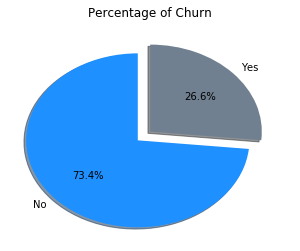

In [11]:
sizes = file['Churn'].value_counts(sort = True)
 
rcParams['figure.figsize'] = 5,4
# Plot
explode = (0.15, 0) 
plt.pie(sizes, explode=explode, labels=file['Churn'].unique(), colors = ['dodgerblue', 'slategray'],
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of Churn')
plt.show()

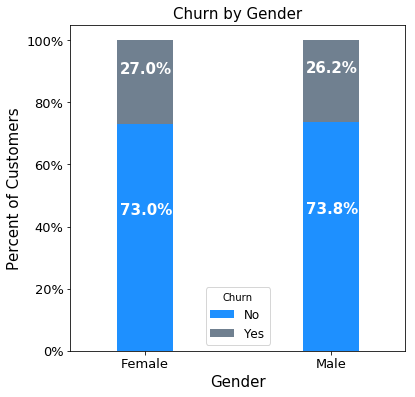

In [12]:
gender_churn = file.groupby(['Churn', 'gender']).size().unstack()

gender_dist = (gender_churn*100.0 / gender_churn.sum()).T.plot(kind='bar', stacked = True, rot = 0, figsize = (6,6), width = 0.3,
                                                             color = ['dodgerblue', 'slategray'], fontsize = 13)
gender_dist.yaxis.set_major_formatter(mtick.PercentFormatter())
gender_dist.set_xlabel('Gender', fontsize = 15)
gender_dist.set_ylabel('Percent of Customers', fontsize = 15)
gender_dist.set_title('Churn by Gender',size = 15)
gender_dist.legend(prop={'size':12}, title = 'Churn')

for i in gender_dist.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    gender_dist.annotate('{:.1f}%'.format(height), (i.get_x() + 0.06*width, i.get_y() + 0.6*height),color = 'white',
                         size = 15, weight = 'bold')

In [13]:
file.groupby(['Churn','gender','SeniorCitizen']).size().unstack().T.iloc[1:,:]

Churn             No         Yes     
gender        Female Male Female Male
SeniorCitizen                        
Yes              328  338    240  236